In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

spikes = pd.read_csv('data/ten_intensities.csv')

# Define experimental parameters 
  # this project already has predetermined parameters
stim_on = 4   # time stimulus turned on
stim_off = 14 # time stimulus turned off
num_trials = 10 # number of trials per intensity level
num_tp = 21     # Number of time points in each trial (0-20 ms, inclusive)
num_intensities = 10 # number of stimulus intensities






In [8]:
#Create array of histograms#
hist = np.zeros([num_intensities, num_tp])

for i in range(num_intensities):
    hist[i,:], bins = np.histogram(spikes[spikes['Intensity'] == i ]['SpikeTime'],
                                  bins = num_tp,
                                  range = (0, num_tp))
print(hist)

# now that the array of histograms has been created I can begin to create the heat map. 


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3. 0. 0. 0. 2. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 0. 1. 1. 1. 2. 2. 0. 2.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 2. 0. 2. 0. 1. 0. 1. 0. 1. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 3. 1. 1. 0. 5. 2. 3. 0. 4. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 2. 0. 1. 2. 3. 4. 5. 3. 2. 4. 1. 2. 3.]
 [0. 0. 0. 1. 0. 0. 1. 2. 1. 3. 8. 5. 1. 3. 6. 0. 2. 5. 0. 4. 3.]
 [1. 1. 0. 0. 0. 0. 1. 0. 6. 8. 3. 6. 2. 5. 1. 0. 3. 5. 5. 1. 0.]
 [3. 0. 0. 0. 0. 1. 0. 2. 7. 4. 2. 4. 4. 1. 0. 0. 2. 3. 3. 0. 0.]]


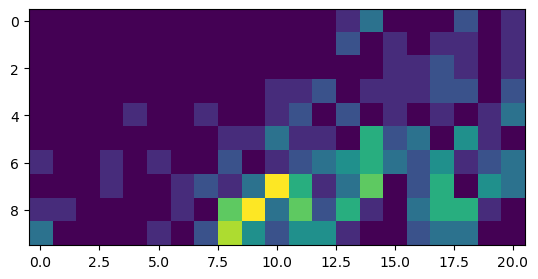

In [9]:
plt.imshow(hist)
plt.show()
# Not very useful right? The next step is to format the heat map. 

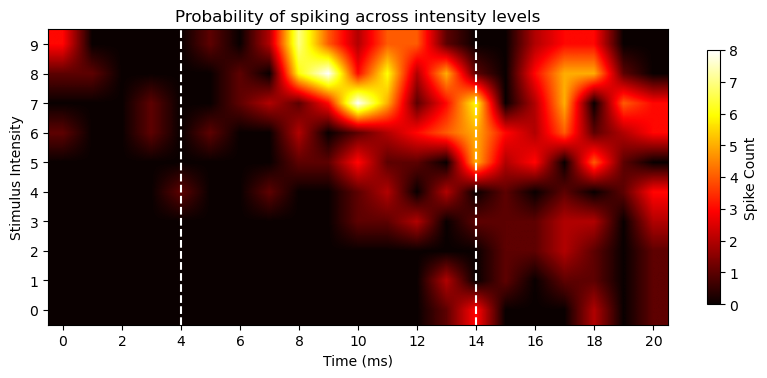

In [19]:
# formating the heat map. 

fig, ax = plt.subplots(figsize=[10,10])

im = ax.imshow(hist,
          origin = "lower",
          cmap = "hot",
          interpolation = 'bilinear'
          )

# drawing lines on the plot for the stimulus on and off times.

ax.axvline(stim_on,color='white',linestyle='--')
ax.axvline(stim_off,color='white',linestyle='--')

# the line below will set the tick mark range and spacing. 

ax.set_xticks(range(0,num_tp + 1, 2))
ax.set_xlabel('Time (ms)')
ax.set_yticks(range(num_intensities))
ax.set_ylabel('Stimulus Intensity')

ax.set_title('Probability of spiking across intensity levels')

cb = fig.colorbar(im,shrink=0.33)

cb.ax.set_ylabel('Spike Count')

plt.show()


